---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [19]:
def answer_one():
    
    data = pd.read_csv('fraud_data.csv')
    classes = data['Class'].value_counts()
    
    return classes[1]/data.shape[0]


In [21]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [22]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    dummyClassifier = DummyClassifier(strategy='most_frequent')
    dummyClassifier.fit(X_train,y_train)
    accuracy = dummyClassifier.score(X_test,y_test)
    recall = recall_score(y_test,dummyClassifier.predict(X_test))
    
    return (accuracy,recall)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [26]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    svm = SVC()
    svm.fit(X_train,y_train)
    preds = svm.predict(X_test)
    accuracy = svm.score(X_test,y_test)
    precision = precision_score(y_test,preds)
    recall = recall_score(y_test,preds)

    return (accuracy,recall,precision)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [46]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    svm = SVC(C= 1e9, gamma= 1e-07)
    preds = svm.fit(X_train,y_train).decision_function(X_test)
    y_preds = preds > -220
    
    
    return confusion_matrix(y_test,y_preds)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,precision_recall_curve
# import matplotlib.pyplot as plt

In [74]:
# logisticR = LogisticRegression()
# logisticR.fit(X_train,y_train)
# preds = logisticR.predict_proba(X_test)

In [75]:
# fpr,tpr,threshold = roc_curve(y_test,preds[:,1])

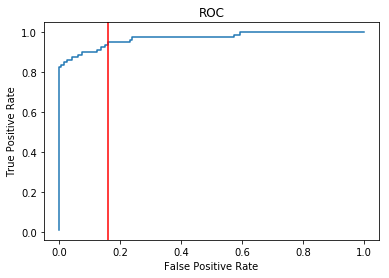

In [78]:
# plt.figure()
# roccurve = plt.plot(fpr,tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC')
# plt.axvline(0.16, color='r')
# plt.show()

In [67]:
# y_probs = logisticR.predict_proba(X_test)
# precision,recall,thresholds = precision_recall_curve(y_test,y_probs[:,1])

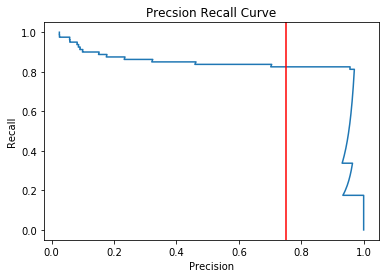

In [69]:
# plt.figure()
# plt.plot(precision,recall)
# plt.xlabel('Precision')
# plt.ylabel('Recall')
# plt.title('Precsion Recall Curve')
# plt.axvline(0.75, color='r')
# plt.show()

In [83]:
def answer_five():
        
    
    
    return (0.81,0.92)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [103]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    clf = LogisticRegression()
    grid = {'penalty': ['l1', 'l2'],'C':[0.01, 0.1, 1, 10, 100]}
    gCv = GridSearchCV(clf,param_grid=grid,scoring='recall',return_train_score =True)
    gCv.fit(X_train,y_train)
    
    return gCv.cv_results_['mean_test_score'].reshape(5,2)


In [100]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);
    
# GridSearch_Heatmap(answer_six())